# Spectral Clustering.

Write code for doing spectral clustering below. 

i.e. Convert the unlabelled data (Data A) into an adjacency matrix using D_{i,j} = exp(-\gamma * ||x_i - x_j||). Convert the adjacency matrix into a Laplacian and find the lowest n eigen-vectors and use that to create feature matrix of shape num_samples-by-n. Use k-means clustering to cluster the resulting data.  

Now plot the following scatterplots of the data with clusterlabels as colors.


1. The results of k-means clustering on the raw data with k=3.
2. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,3 and 3.
3. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,10 and 3.
4. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 3 and 3.
5. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 10 and 3.


Comment on the nature of the results in the text cell below.

You are only allowed to use the pratical eigen vector finder given as defined above here. This is meant to simulate real eigen solvers which are iterative and approximate in nature. You can use the import of KMeans from sklearn to begin with, but the final submission should be based on your own implementation of kMeans or there will be a penalty.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def practical_eigen_symmetric(L):
    # Returns the eigen values and eigen vectors of a symmetric matrix L. eigen values are sorted in ascending order, and eig_vecs[:,i] corresponds to the ith eigen vector
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

def adjacency_matrix(X, gamma):
    n_samples = X.shape[0]
    dist_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            d = np.linalg.norm(X[i] - X[j])
            dist_matrix[i, j] = d
            dist_matrix[j, i] = d
    A = np.exp(-gamma * dist_matrix)
    return A

def compute_laplacian(A):
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    return L

def kmeans(X, k, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        labels = np.zeros(n_samples, dtype=int)
        distances = np.zeros((n_samples, k))
    
        # Compute distances from each point to each centroid
        for i in range(n_samples):
            for j in range(k):
                distances[i, j] = np.linalg.norm(X[i] - centroids[j])
    
        # Assign each point to the nearest centroid
        for i in range(n_samples):
            labels[i] = np.argmin(distances[i])
        
        # Make new centroids array
        new_centroids = np.zeros((k, n_features)) #Initialization
        for j in range(k):
            points_in_cluster = X[labels == j]
            if len(points_in_cluster) > 0:
                new_centroids[j] = np.mean(points_in_cluster, axis=0)
            else:
                new_centroids[j] = centroids[j]  # If a cluster is empty, retain the old centroid

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels

def spectral_clustering(X, gamma, n, k):
    A = adjacency_matrix(X, gamma)
    L = compute_laplacian(A)
    _, eig_vecs = practical_eigen_symmetric(L)
    feature_matrix = eig_vecs[:, :n]
    labels = kmeans(feature_matrix, k, 100)
    return labels

def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Feature 1',size=15)
    plt.ylabel('Feature 2',size=15)
    plt.title(title)
    plt.show()

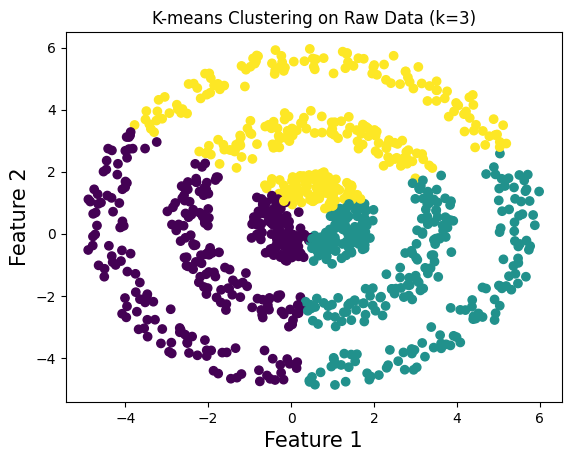

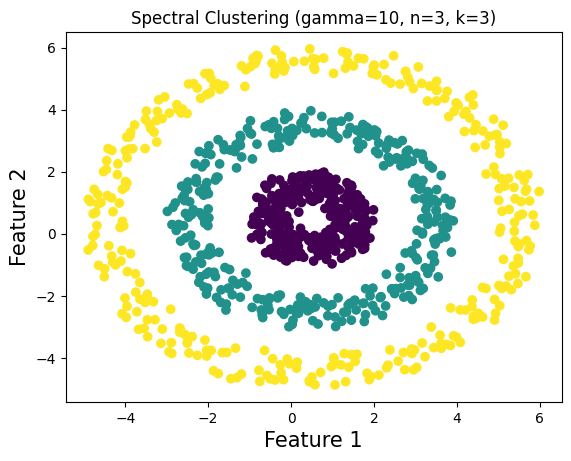

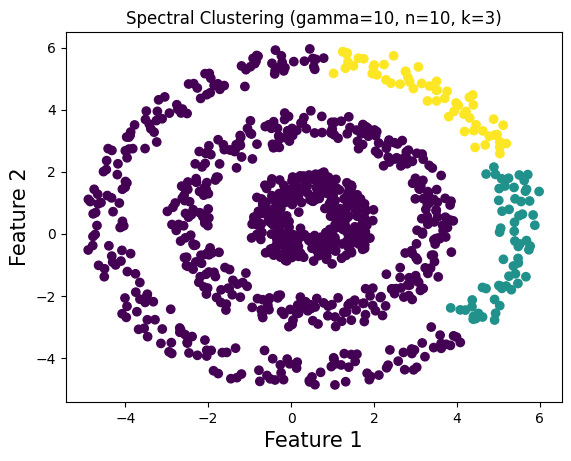

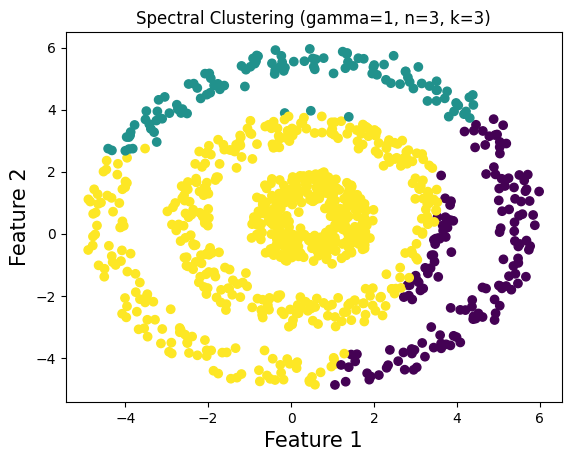

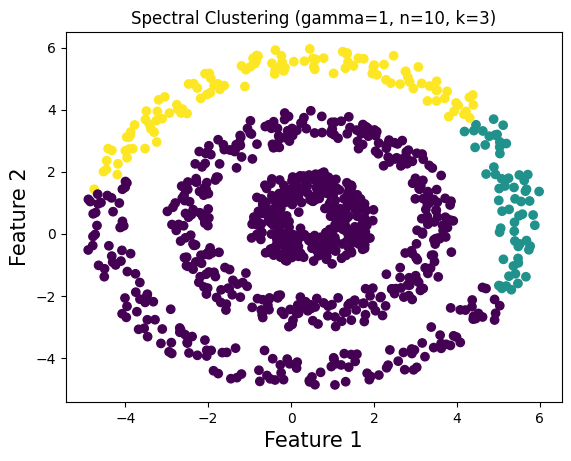

In [3]:
# Get the 5 scatter plots here

# Loading Dataset_A
dataA = np.load('Data/Dataset_A.npy')

#Plotting

#For K-means clustering on the raw data with k=3
kmeans_labels = kmeans(dataA, 3)
# kmeans_labels = KMeans(n_clusters=3).fit_predict(X)
plot_clusters(dataA, kmeans_labels, 'K-means Clustering on Raw Data (k=3)')

#For Spectral clustering with

#gamma=10, n=3, k=3
spectral_labels_1 = spectral_clustering(dataA, gamma=10, n=3, k=3)
plot_clusters(dataA, spectral_labels_1, 'Spectral Clustering (gamma=10, n=3, k=3)')

#gamma=10, n=10, k=3
spectral_labels_2 = spectral_clustering(dataA, gamma=10, n=10, k=3)
plot_clusters(dataA, spectral_labels_2, 'Spectral Clustering (gamma=10, n=10, k=3)')

#gamma=1, n=3, k=3
spectral_labels_3 = spectral_clustering(dataA, gamma=1, n=3, k=3)
plot_clusters(dataA, spectral_labels_3, 'Spectral Clustering (gamma=1, n=3, k=3)')

#gamma=1, n=10, k=3
spectral_labels_4 = spectral_clustering(dataA, gamma=1, n=10, k=3)
plot_clusters(dataA, spectral_labels_4, 'Spectral Clustering (gamma=1, n=10, k=3)')

# Textwrite cell 

### Observation and explanation:

#### K-means Clustering on Raw Data (k=3)
- **Observation**: The K-means clustering on the raw data does not correctly identify the clusters. It splits the data based on proximity in the Euclidean space rather than the actual structure.
- **Explanation**: K-means works best for spherical clusters and struggles with non-convex clusters, such as the concentric circles in this dataset.

#### Spectral Clustering (gamma=10, n=3, k=3)
- **Observation**: This configuration of spectral clustering correctly identifies the three concentric clusters.
- **Explanation**: A high gamma value (10) strengthens the similarity between nearby points, helping to preserve the local neighborhood structure. Using 3 eigenvectors captures enough of the data’s structure to separate the clusters effectively.

#### Spectral Clustering (gamma=10, n=10, k=3)
- **Observation**: This configuration fails to correctly identify the clusters.
- **Explanation**: Increasing the number of eigenvectors to 10 might introduce noise or irrelevant information, which can confuse the clustering algorithm. When too many dimensions are considered, the significant structure captured by the first few eigenvectors might be diluted.

#### Spectral Clustering (gamma=1, n=3, k=3)
- **Observation**: This configuration also fails to identify the clusters correctly.
- **Explanation**: A lower gamma value (1) results in a weaker similarity measure, making the adjacency matrix less effective at capturing the true neighborhood structure. This leads to poor clustering performance even though the number of eigenvectors is appropriate.

#### Spectral Clustering (gamma=1, n=10, k=3)
- **Observation**: This configuration fails to identify the clusters correctly as well.
- **Explanation**: Similar to the previous case, the lower gamma value results in poor similarity measures. Additionally, using more eigenvectors (10) introduces further noise and irrelevant dimensions, compounding the problem and leading to poor clustering.

### General Comments
- **Gamma Value**: A higher gamma value helps to create a stronger local neighborhood structure, which is crucial for spectral clustering to work well. However, if it is too high, it can also lead to overfitting.
- **Number of Eigenvectors (n)**: Using too many eigenvectors can introduce noise, while too few might not capture enough structure. The first few eigenvectors usually contain the most significant structure of the data.
